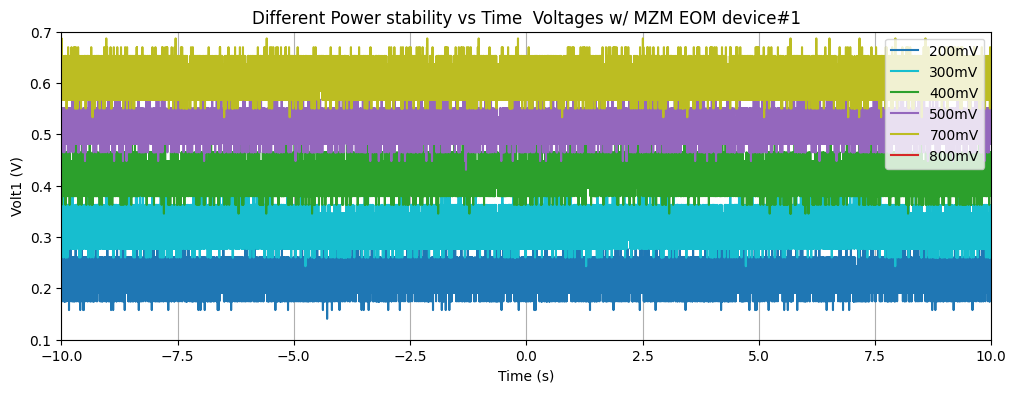

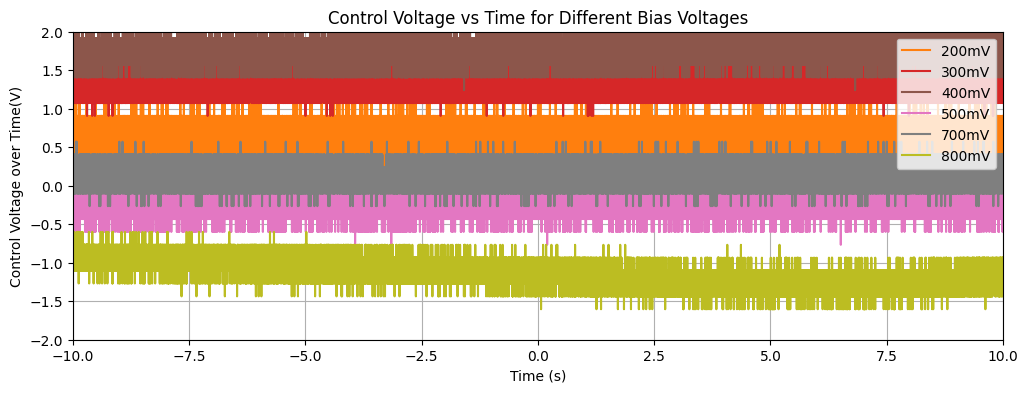

Average and Standard Deviation of Voltages:

200mV:
 Power → Average = 0.220557 V, Std Dev = 0.018389 V, Normalized Error = 8.337515 %
--------------------------------------------------
300mV:
 Power → Average = 0.317850 V, Std Dev = 0.019584 V, Normalized Error = 6.161304 %
--------------------------------------------------
400mV:
 Power → Average = 0.418632 V, Std Dev = 0.019145 V, Normalized Error = 4.573246 %
--------------------------------------------------
500mV:
 Power → Average = 0.514229 V, Std Dev = 0.018375 V, Normalized Error = 3.573220 %
--------------------------------------------------
700mV:
 Power → Average = 0.608221 V, Std Dev = 0.020832 V, Normalized Error = 3.425005 %
--------------------------------------------------
800mV:
 Power → Average = 0.801955 V, Std Dev = 0.014511 V, Normalized Error = 1.809471 %
--------------------------------------------------


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle

# Function to load a CSV and clean headers
def load_csv(filename):
    df = pd.read_csv(filename, skiprows=1)
    df.columns = ['second', 'Volt1', 'Volt2']
    return df

# List of CSV files and labels
files = ['200mv.csv', '300mv.csv', '400mv.csv', '500mv.csv', '700mv.csv', '800mv.csv']
labels = ['200mV', '300mV', '400mV', '500mV', '700mV', '800mV']

# Colors for plotting
colors = cycle(['tab:blue', 'tab:cyan', 'tab:green', 'tab:purple', 'tab:olive', 'tab:red'])

# -------- Plot Volt1 --------
fig1, ax1 = plt.subplots(figsize=(12,4))
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Volt1 (V)')

for f, lbl in zip(files, labels):
    df = load_csv(f)
    color = next(colors)
    ax1.plot(df['second'], df['Volt1'], color=color, label=f'{lbl}')

ax1.set_xlim(-10, 10)
ax1.set_ylim(0.1, 0.7)
ax1.set_title('Different Power stability vs Time  Voltages w/ MZM EOM device#1')
ax1.grid(True)
ax1.legend(loc='upper right')
plt.show()

# -------- Plot Volt2 --------
colors = cycle(['tab:orange', 'tab:red', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive'])
fig2, ax2 = plt.subplots(figsize=(12,4))
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Control Voltage over Time(V)')

for f, lbl in zip(files, labels):
    df = load_csv(f)
    color = next(colors)
    ax2.plot(df['second'], df['Volt2'], color=color, label=f'{lbl}')

ax2.set_xlim(-10, 10)
ax2.set_ylim(-2, 2)
ax2.set_title('Control Voltage vs Time for Different Bias Voltages')
ax2.grid(True)
ax2.legend(loc='upper right')
plt.show()

# -------- Print averages and standard deviations --------
print("Average and Standard Deviation of Voltages:\n")
for f, lbl in zip(files, labels):
    df = load_csv(f)
    avg_volt1 = df['Volt1'].mean()
    std_volt1 = df['Volt1'].std()
    avg_volt2 = df['Volt2'].mean()
    std_volt2 = df['Volt2'].std()
    
    print(f"{lbl}:")
    print(f" Power → Average = {avg_volt1:.6f} V, Std Dev = {std_volt1:.6f} V, Normalized Error = {std_volt1 * 100 / avg_volt1:.6f} %")
    #print(f" Control Voltage→ Average = {avg_volt2:.6f} V, Std Dev = {std_volt2:.6f} V, Error = {std_volt2:.6f*100/avg_volt2:.6f} %")
    print('-'*50)


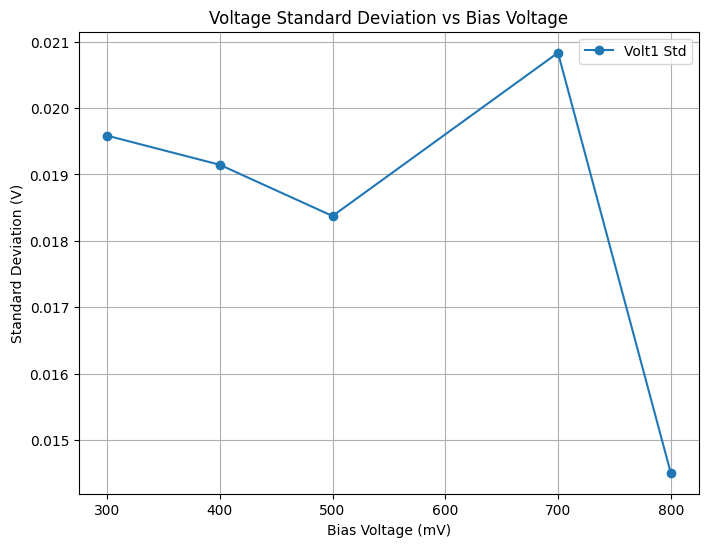

In [44]:

# Function to load a CSV and clean headers
def load_csv(filename):
    df = pd.read_csv(filename, skiprows=1)
    df.columns = ['second', 'Volt1', 'Volt2']
    return df

# List of CSV files and their corresponding power (in mV)
files = ['300mv.csv', '400mv.csv', '500mv.csv', '700mv.csv', '800mv.csv']
powers = [300, 400, 500, 700, 800]  # x-axis

# Lists to store standard deviations
std_volt1 = []
std_volt2 = []

# Calculate standard deviations for each CSV
for f in files:
    df = load_csv(f)
    std_volt1.append(df['Volt1'].std())
    std_volt2.append(df['Volt2'].std())

# Plot standard deviation vs bias voltage
plt.figure(figsize=(8,6))
plt.plot(powers, std_volt1, 'o-', color='tab:blue', label='Volt1 Std')
#plt.plot(powers, std_volt2, 's-', color='tab:orange', label='Volt2 Std')
plt.xlabel('Bias Voltage (mV)')
plt.ylabel('Standard Deviation (V)')
plt.title('Voltage Standard Deviation vs Bias Voltage')
plt.grid(True)
plt.legend()
plt.show()